In [1]:
import os
import pandas as pd
#libreria para graficar
import matplotlib.pyplot as plt
import numpy as np;
import scipy.signal as signal;
import scipy.io as sio;


In [72]:
# Ruta del archivo a leer
ruta_archivo = 'C:\\Users\\ORMAN\\Desktop\\Bioseñales\\Proyecto_2\\RegistrosCon\\6\\datos_modificados.txt'

In [73]:


# Leer el archivo y crear un DataFrame
df = pd.read_csv(ruta_archivo, header=0, names=['EMG', 'tiempo'], delim_whitespace=True)


C:\Users\ORMAN\AppData\Local\Temp\ipykernel_37892\4260204646.py:2: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(ruta_archivo, header=0, names=['EMG', 'tiempo'], delim_whitespace=True)


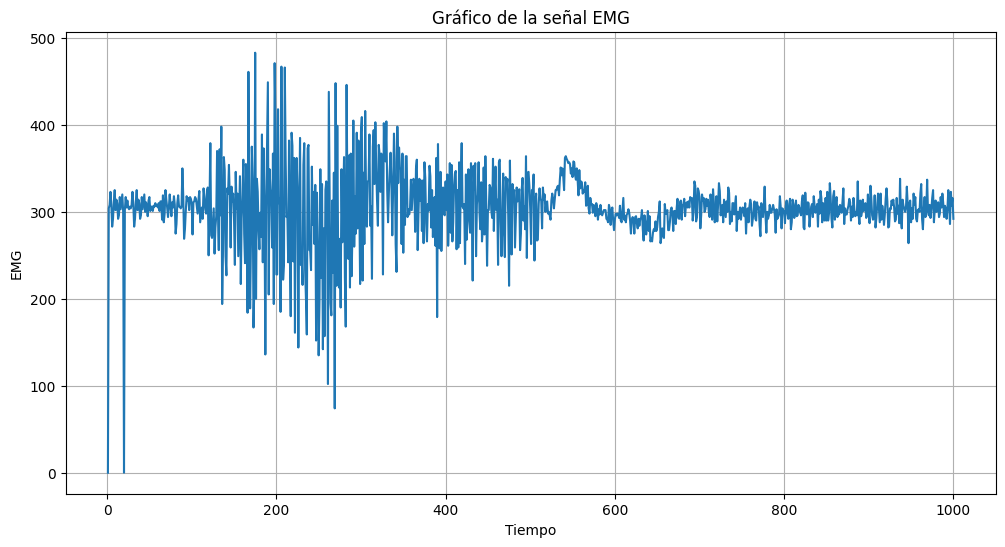

In [74]:
# Graficar los datos
plt.figure(figsize=(12, 6))
plt.plot(df['tiempo'], df['EMG'])
plt.title('Gráfico de la señal EMG')
plt.xlabel('Tiempo')
plt.ylabel('EMG')
plt.grid(True)
plt.show()

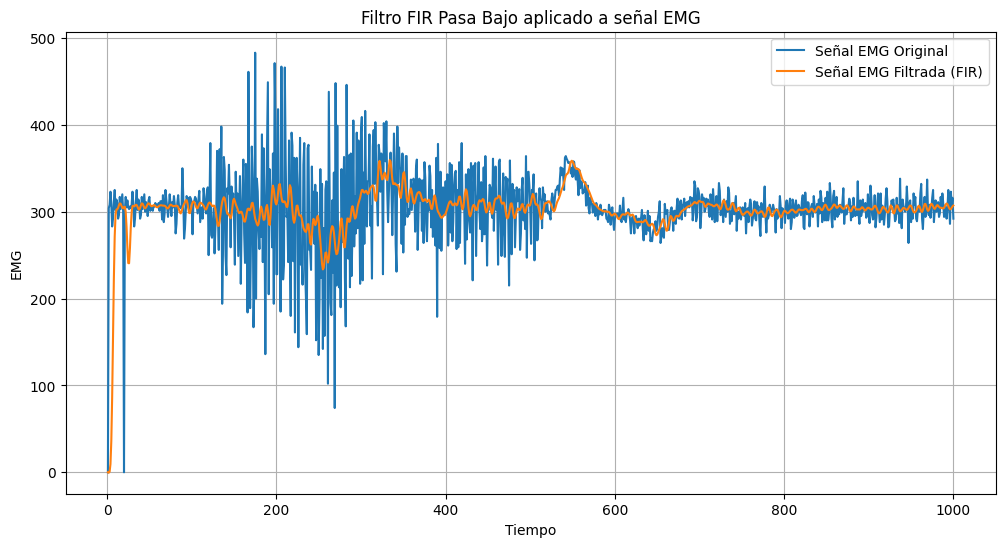

Coeficientes del filtro FIR:
b_fir: [-0.0016179   0.00378242  0.02902978  0.08717475  0.16331498  0.21831598
  0.21831598  0.16331498  0.08717475  0.02902978  0.00378242 -0.0016179 ]


In [75]:

# Frecuencia de corte del filtro FIR pasa bajo
fc_fir = 10  # Hz
fs = 100  # Frecuencia de muestreo de la señal (Hz)
nyquist = 0.5 * fs
wn_fir = fc_fir / nyquist

# Diseño del filtro FIR pasa bajo
order_fir = 12
b_fir = signal.firwin(order_fir, wn_fir, window='hamming')
emg_filtrada_fir = signal.lfilter(b_fir, 1, df['EMG'])

# Graficar la señal original y la señal filtrada por el filtro FIR
plt.figure(figsize=(12, 6))
plt.plot(df['tiempo'], df['EMG'], label='Señal EMG Original')
plt.plot(df['tiempo'], emg_filtrada_fir, label='Señal EMG Filtrada (FIR)')
plt.title('Filtro FIR Pasa Bajo aplicado a señal EMG')
plt.xlabel('Tiempo')
plt.ylabel('EMG')
plt.legend()
plt.grid(True)
plt.show()

print("Coeficientes del filtro FIR:")
print("b_fir:", b_fir)

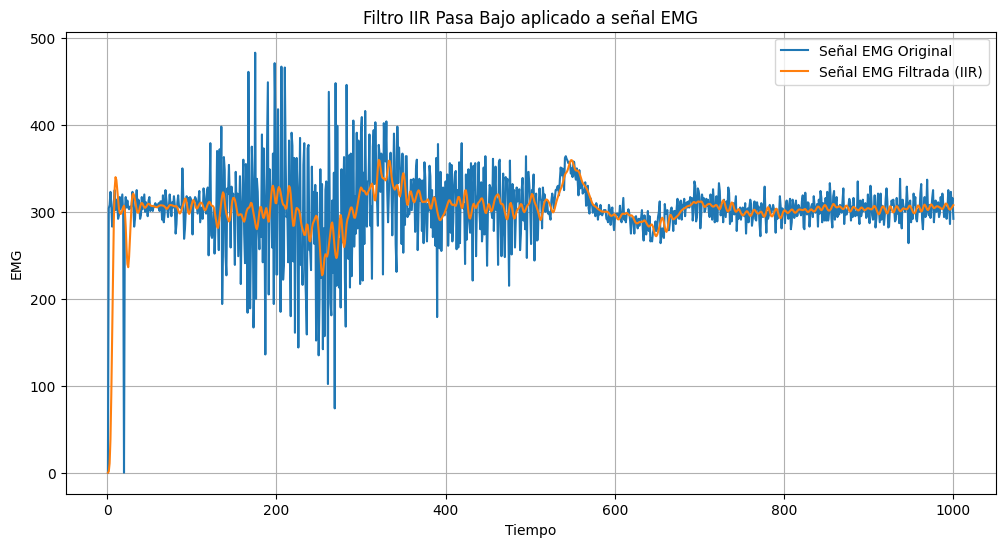


Coeficientes del filtro IIR:
b_iir: [0.00482434 0.01929737 0.02894606 0.01929737 0.00482434]
a_iir: [ 1.         -2.36951301  2.31398841 -1.05466541  0.18737949]


In [76]:
fc_iir = 10  # Hz
wn_iir = fc_iir / nyquist

# Diseño del filtro IIR pasa bajo
order_iir = 4  # Orden del filtro IIR
b_iir, a_iir = signal.butter(order_iir, wn_iir, btype='low')

emg_filtrada_iir = signal.lfilter(b_iir, a_iir, df['EMG'])

# Graficar la señal original y la señal filtrada por el filtro IIR
plt.figure(figsize=(12, 6))
plt.plot(df['tiempo'], df['EMG'], label='Señal EMG Original')
plt.plot(df['tiempo'], emg_filtrada_iir, label='Señal EMG Filtrada (IIR)')
plt.title('Filtro IIR Pasa Bajo aplicado a señal EMG')
plt.xlabel('Tiempo')
plt.ylabel('EMG')
plt.legend()
plt.grid(True)
plt.show()

print("\nCoeficientes del filtro IIR:")
print("b_iir:", b_iir)
print("a_iir:", a_iir)

In [77]:
from sklearn.metrics import mean_squared_error
from scipy.stats import pearsonr

# Señal original
emg_original = df['EMG']

# Señales filtradas
emg_fir = signal.filtfilt(b_fir, 1, emg_original)
emg_iir = signal.filtfilt(b_iir, a_iir, emg_original)

# Calcular Error Cuadrático Medio (MSE) y Coeficiente de Correlación
mse_fir = mean_squared_error(emg_original, emg_fir)
mse_iir = mean_squared_error(emg_original, emg_iir)

corr_fir, _ = pearsonr(emg_original, emg_fir)
corr_iir, _ = pearsonr(emg_original, emg_iir)

print("Filtro FIR:")
print(f"Error Cuadrático Medio (MSE): {mse_fir}")
print(f"Coeficiente de Correlación: {corr_fir}\n")

print("Filtro IIR:")
print(f"Error Cuadrático Medio (MSE): {mse_iir}")
print(f"Coeficiente de Correlación: {corr_iir}")

Filtro FIR:
Error Cuadrático Medio (MSE): 1573.4389993229286
Coeficiente de Correlación: 0.40311701206425454

Filtro IIR:
Error Cuadrático Medio (MSE): 1553.8113198495948
Coeficiente de Correlación: 0.41489393406535224
